In [1]:
from vega import VegaLite
import json 
from pandas.io.json import json_normalize
import pandas as pd
import requests
import pprint
import urllib
from IPython.display import display

In [2]:
# Download the map
import urllib
urllib.urlretrieve ("https://raw.githubusercontent.com/d3/d3-geo/master/test/data/us-10m.json", "us-10m.json")
%ls

cars.json                        pollution_us_2000_2016.csv.zip
GeographicalDisplay.ipynb        StaticScatterPlot.ipynb
GeographicalMap_Income.ipynb     us-10m.json
GeographicalMap_Pollution.ipynb  us-state-capitals.jso
income.json                      us-state-capitals.json
pollution_us_2000_2016.csv


In [8]:
filename = 'us-10m.json'
with open(filename, "r") as f:
    js_geo = json.load(f)
    
list(js_geo.keys())
print(json.dumps(js_geo, indent=2))

{
  "objects": {
    "states": {
      "type": "GeometryCollection", 
      "geometries": [
        {
          "type": "MultiPolygon", 
          "id": 1, 
          "arcs": [
            [
              [
                6960, 
                -6779, 
                -6725, 
                -6740, 
                -6751, 
                -6750, 
                -6812, 
                -6811, 
                -6818, 
                -6817, 
                -6833, 
                6996, 
                -7015, 
                -7019, 
                7048, 
                -7189, 
                -7192, 
                7226, 
                -7446, 
                7518, 
                7519, 
                -7600, 
                7723, 
                7724, 
                -7870, 
                7896, 
                -8039, 
                8080, 
                -8132, 
                -8178, 
                8215, 
                -8312, 
                8339, 
             

In [9]:
# As can be seen, each state will have 
# GeometryCollection such as Multipolygon and have an id with arcs
# Let us verify that we have 53 states in the US
print(len(js_geo['objects']['states']['geometries']))

53


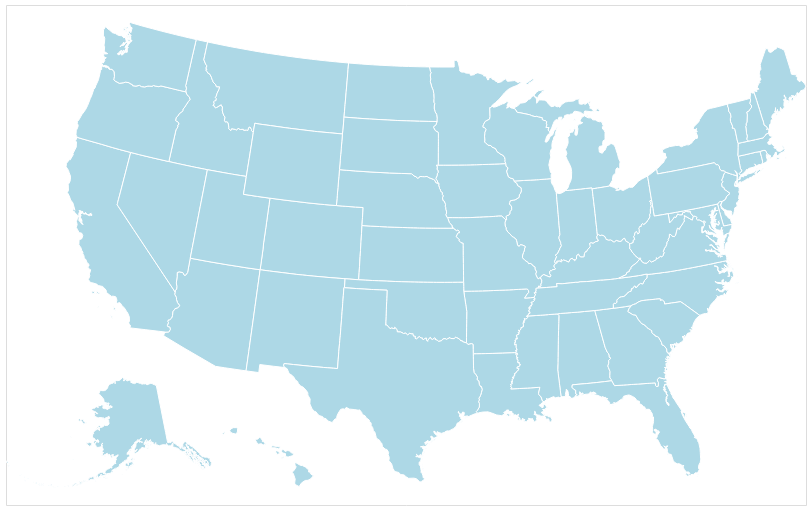

In [10]:
# Create a vgObj to visualize the US map
vgObj = {
    "$schema": "https://vega.github.io/schema/vega-lite/v2.1.json",
    "width": 800,
    "height": 500,
    "projection": {"type": "albersUsa"},
    "layer": [{
        "data": {
            "url": "us-10m.json",
            "format": {
                "type": "topojson",
                "feature": "states"
            }
        },
        "mark": {
            "type": "geoshape",
            "fill": "lightblue", #"lightblue","lightgray" <~ Play with this
            "stroke": "white"
            }
        },
    ],
}
VegaLite(vgObj)

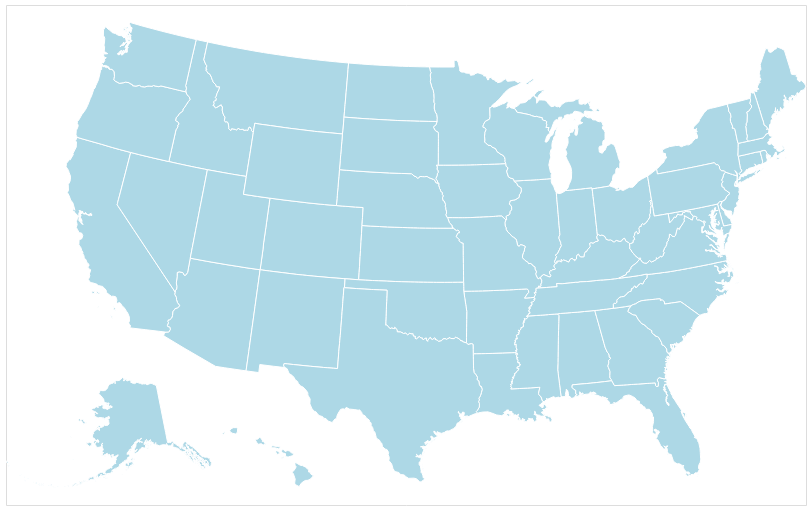

In [5]:
# Now we want to put the name of each state to the map,
import urllib
urllib.urlretrieve ("https://raw.githubusercontent.com/vega/vega/master/docs/data/us-state-capitals.json", "us-state-capitals.json")
%ls

cars.json                        pollution_us_2000_2016.csv.zip
GeographicalDisplay.ipynb        StaticScatterPlot.ipynb
GeographicalMap_Income.ipynb     us-10m.json
GeographicalMap_Pollution.ipynb  us-state-capitals.jso
income.json                      us-state-capitals.json
pollution_us_2000_2016.csv


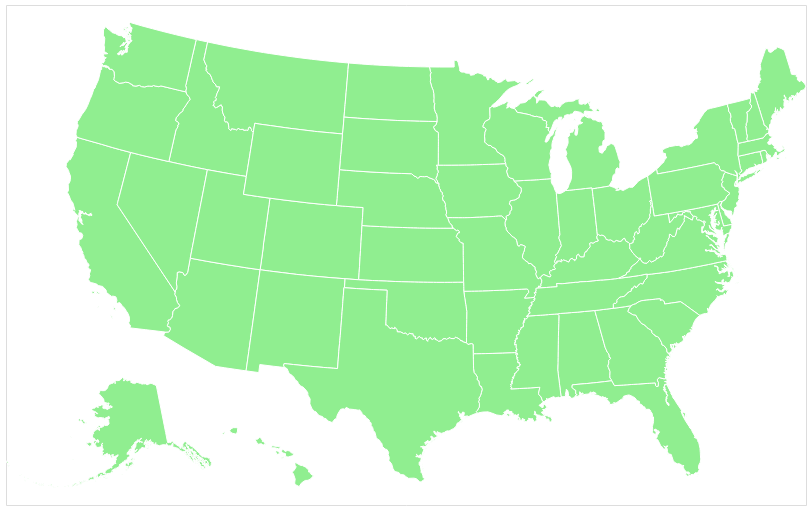

In [ ]:
# Okay, so far so good when we can change the each state colors
# Let us do more visualization in each state. 